In [ ]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../../..")))

from src.scripts.analysis.functional_clustering import (
    get_station_daytype_signatures,
    cluster_stations_by_daytype,
    visualize_clusters_per_date_type,
    hierarchical_station_clustering,
    flatten_feature_matrix,
    test_clustering_stability_and_quality,
)

from src.constants.seed import SEED

<class 'src.repo.v1.stations.models.Station'> <class 'src.repo.v1.estimates.models.Estimate'> <class 'src.repo.v1.processing.models.ProcessedFile'>


In [2]:

features_df = get_station_daytype_signatures(lambda_type="in", normalize=True)
feature_mat = flatten_feature_matrix(features_df)

In [3]:
wd_features = feature_mat[feature_mat["date_type"] == "WD"]

stability_quality_df = test_clustering_stability_and_quality(
    wd_features,
    k_values=[2, 3, 4, 5, 6],
    seeds=[0, 42, 123, 999],
)

display(stability_quality_df)


,n_clusters,mean_ARI,silhouette
0,2,1.000000,0.381824
1,3,0.785643,0.306007
2,4,0.662796,0.237384
3,5,0.598527,0.229255
4,6,0.585674,0.230534


In [4]:
wd_features = feature_mat[feature_mat["date_type"] == "SA"]

stability_quality_df = test_clustering_stability_and_quality(
    wd_features,
    k_values=[2, 3, 4, 5, 6],
    seeds=[0, 42, 123, 999],
)

display(stability_quality_df)


,n_clusters,mean_ARI,silhouette
0,2,1.000000,0.363343
1,3,0.676233,0.335677
2,4,0.686912,0.254219
3,5,0.484191,0.242519
4,6,0.521114,0.204636


In [5]:
wd_features = feature_mat[feature_mat["date_type"] == "SU"]

stability_quality_df = test_clustering_stability_and_quality(
    wd_features,
    k_values=[2, 3, 4, 5, 6],
    seeds=[0, 42, 123, 999],
)

display(stability_quality_df)


,n_clusters,mean_ARI,silhouette
0,2,0.489232,0.275667
1,3,0.714704,0.300336
2,4,1.000000,0.308542
3,5,0.587322,0.260690
4,6,0.679387,0.208306


In [10]:
wd_features = feature_mat[feature_mat["date_type"] == "HO"]

stability_quality_df = test_clustering_stability_and_quality(
    wd_features,
    k_values=[2, 3, 4, 5, 6],
    seeds=[0, 42, 123, 999],
)

display(stability_quality_df)


,n_clusters,mean_ARI,silhouette
0,2,0.492598,0.280853
1,3,0.499657,0.229850
2,4,0.662377,0.278160
3,5,0.805348,0.290024
4,6,0.642827,0.267500


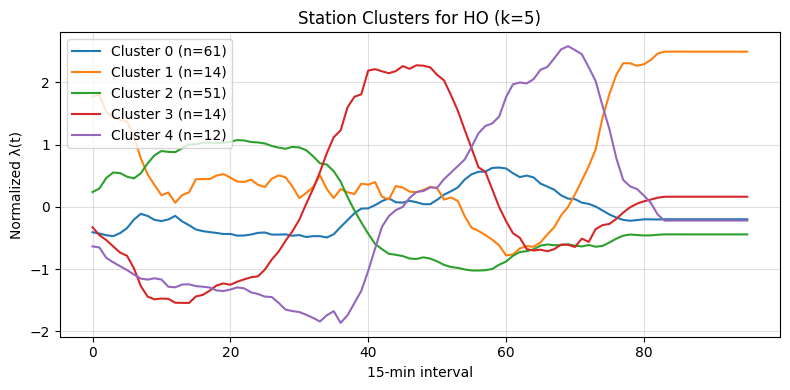

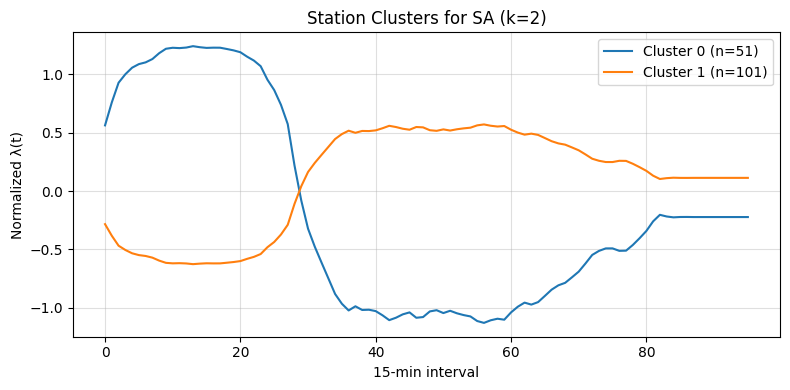

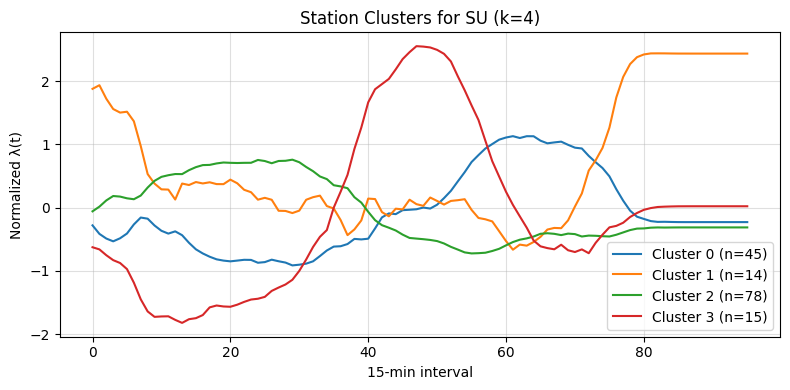

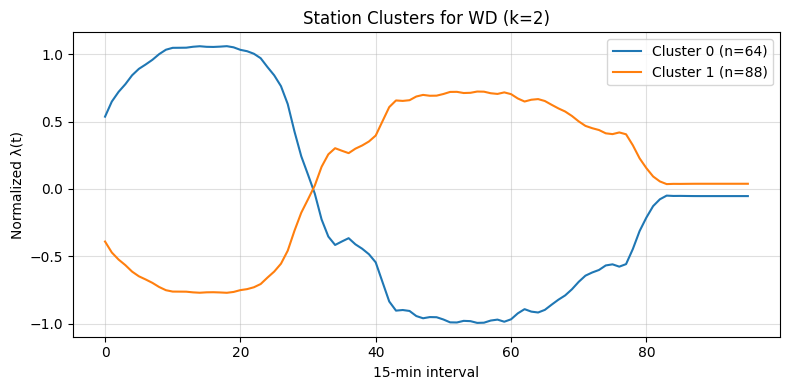

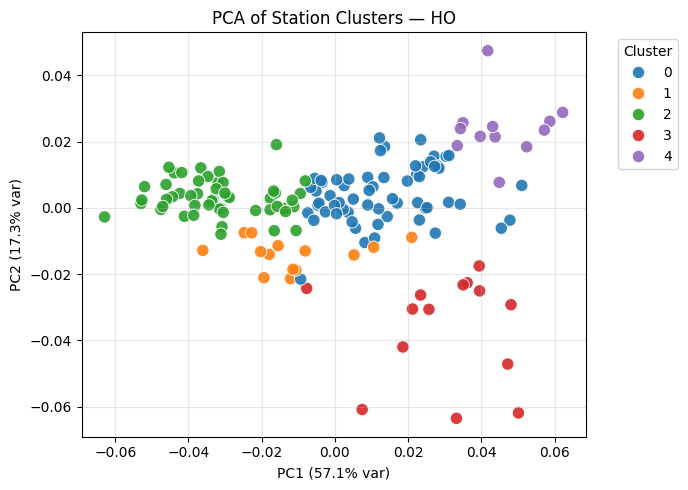

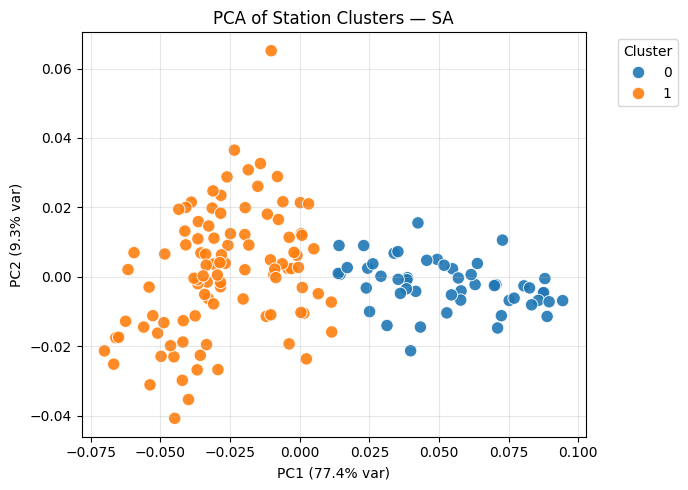

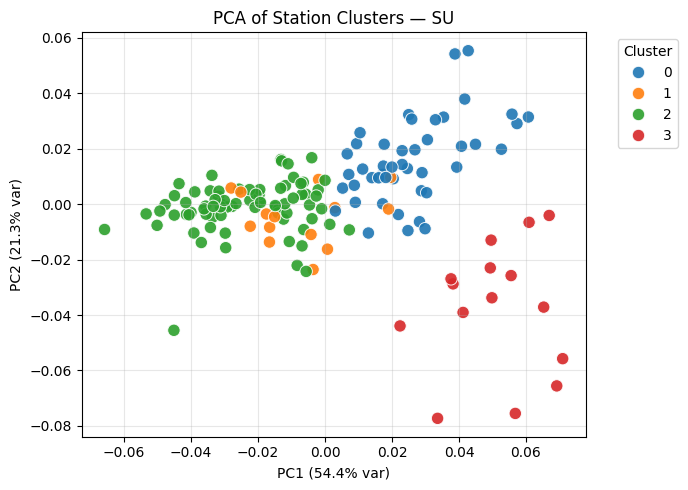

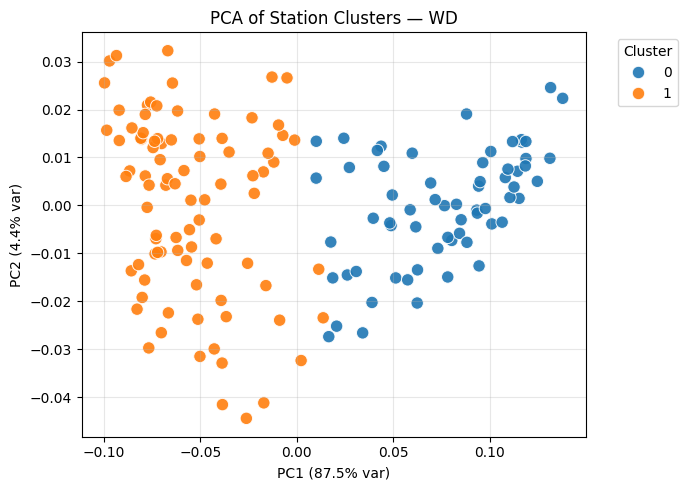

=== Weekday Cluster 0 (n=64) ===


,station_id,code,name,date_type,cluster
456,1,05100,Banderas P. Central,WD,0
457,2,09000,Cabecera Usme,WD,0
458,3,05000,Portal Américas,WD,0
459,4,07000,Portal Sur JFK Coop. Financiera,WD,0
460,5,57503,Ampliacion San Mateo,WD,0
...,...,...,...,...,...
574,119,05102,Av. Américas - Av. Boyacá,WD,0
589,134,05101,Mandalay - Cr.73,WD,0
593,138,02103,Mazurén,WD,0
596,141,02001,Centro Comercial Santa Fe,WD,0


=== Weekday Cluster 1 (n=88) ===


,station_id,code,name,date_type,cluster
470,15,09105,Río Fucha,WD,1
480,25,05107,Américas - Cr.53,WD,1
482,27,07007,NQS - Calle 38A Sur,WD,1
483,28,07005,ALQUERIA,WD,1
485,30,12001,Carrera 43 - COMAPAN,WD,1
...,...,...,...,...,...
603,155,09120,Calle 63,WD,1
604,156,09122,Calle 72,WD,1
605,159,09124,Temporal Calle 34 - Fondo Nacional de Garantias,WD,1
606,160,09125,Temporal Calle 57,WD,1


In [7]:
# Define how many clusters to use per day type
N_CLUSTERS_BY_TYPE = {
    "WD": 2,   # Weekdays
    "SA": 2,   # Saturdays
    "SU": 4,   # Sundays
    "HO": 5,   # Holidays
}

# Run clustering using the new dictionary
cluster_df, summary_df = cluster_stations_by_daytype(
    features_df,
    n_clusters_by_type=N_CLUSTERS_BY_TYPE,
    seed=SEED,
)

# Visualize PCA per day type
visualize_clusters_per_date_type(cluster_df)

# Example: display each WD cluster’s stations
wd_n_clusters = N_CLUSTERS_BY_TYPE["WD"]

for n in range(wd_n_clusters):
    filtered_df = summary_df[
        (summary_df["date_type"] == "WD") & (summary_df["cluster"] == n)
    ]
    print(f"=== Weekday Cluster {n} (n={len(filtered_df)}) ===")
    display(filtered_df)


d:\dequi\repositories\osltm\src\scripts\analysis\functional_clustering.py:359: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist, method="average")


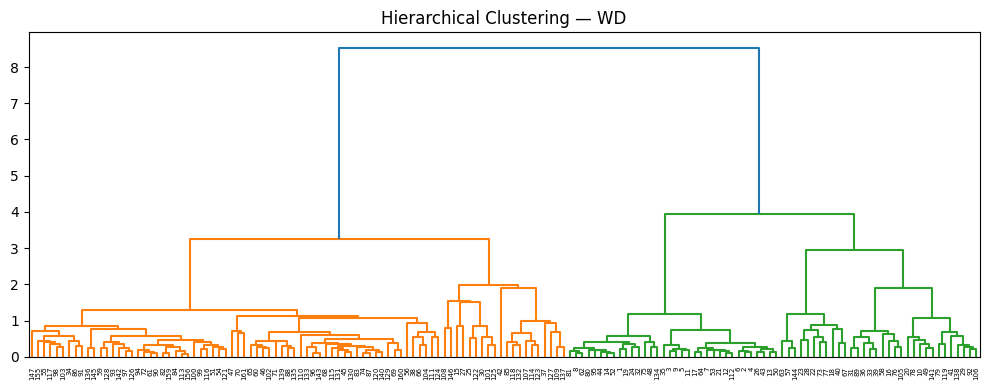

d:\dequi\repositories\osltm\src\scripts\analysis\functional_clustering.py:359: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist, method="average")


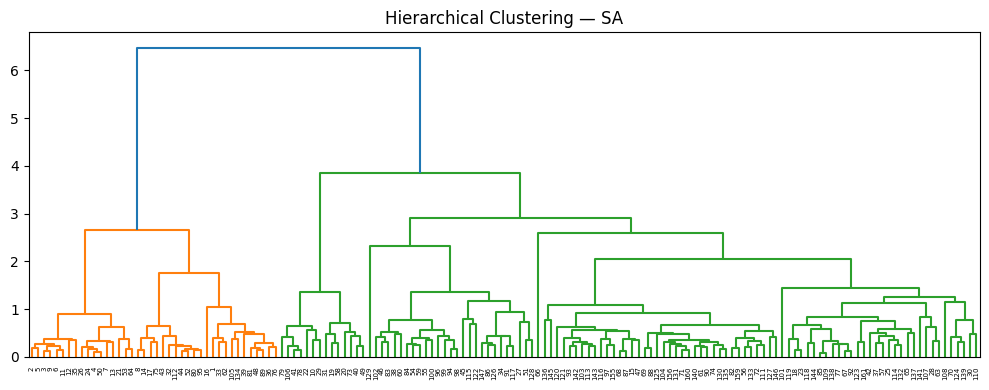

d:\dequi\repositories\osltm\src\scripts\analysis\functional_clustering.py:359: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist, method="average")


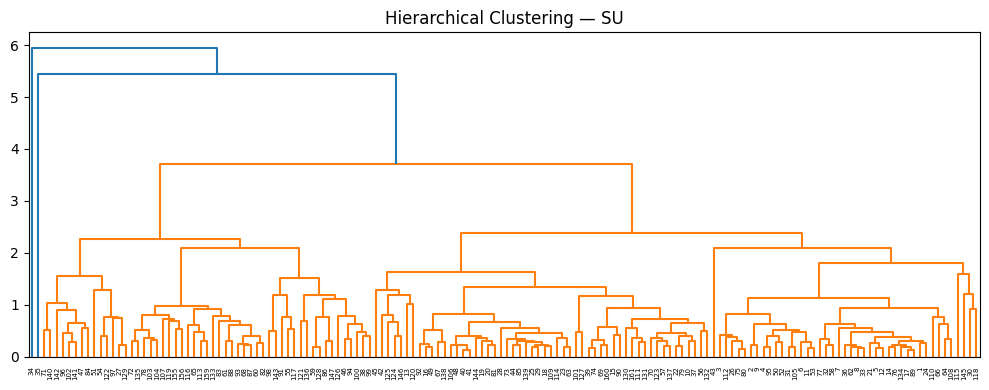

d:\dequi\repositories\osltm\src\scripts\analysis\functional_clustering.py:359: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist, method="average")


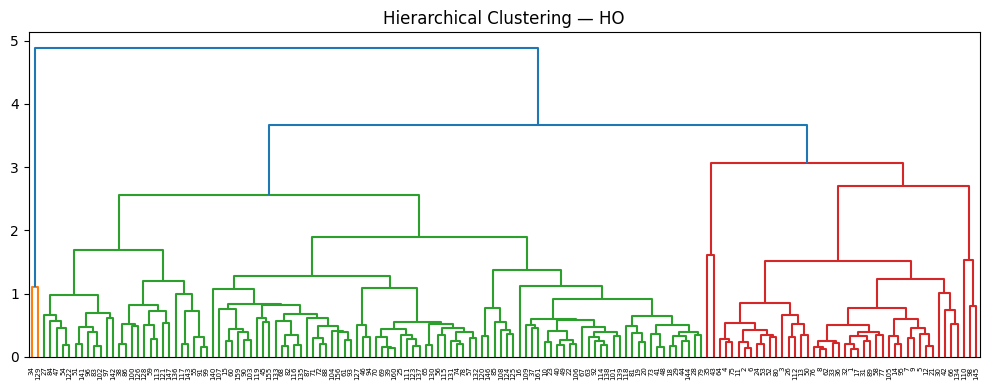

,t_00,t_01,t_02,t_03,t_04,t_05,t_06,t_07,t_08,t_09,...,t_89,t_90,t_91,t_92,t_93,t_94,t_95,station_id,date_type,cluster
0,0.000958,0.001298,0.002534,0.004676,0.007076,0.009143,0.010301,0.011210,0.012421,0.013570,...,0.000487,0.000487,0.000487,0.000487,0.000487,0.000487,0.000487,1,HO,4
4,0.008208,0.006711,0.009912,0.012498,0.015667,0.016073,0.016532,0.017962,0.018551,0.019185,...,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383,2,HO,4
8,0.008279,0.008846,0.012538,0.015142,0.018758,0.019638,0.020076,0.020045,0.018875,0.019402,...,0.000161,0.000161,0.000161,0.000161,0.000161,0.000161,0.000161,3,HO,4
12,0.002038,0.003359,0.007029,0.010713,0.013891,0.014832,0.015543,0.016966,0.018218,0.018547,...,0.000225,0.000225,0.000225,0.000225,0.000225,0.000225,0.000225,4,HO,4
16,0.005128,0.007579,0.013224,0.015064,0.015873,0.015421,0.015180,0.015881,0.016210,0.016115,...,0.000873,0.000873,0.000873,0.000873,0.000873,0.000873,0.000873,5,HO,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.004116,0.006057,0.008037,0.010826,0.011624,0.011061,0.011128,0.011630,0.011240,0.009962,...,0.000445,0.000445,0.000445,0.000445,0.000445,0.000445,0.000445,155,HO,2
592,0.000979,0.000979,0.001396,0.003120,0.003129,0.007470,0.010114,0.011536,0.011845,0.008466,...,0.000979,0.000979,0.000979,0.000979,0.000979,0.000979,0.000979,156,HO,2
596,0.002404,0.001786,0.002004,0.003204,0.003927,0.005514,0.008806,0.011875,0.011696,0.008567,...,0.002531,0.002531,0.002531,0.002531,0.002531,0.002531,0.002531,159,HO,2
600,0.001472,0.002739,0.005306,0.005990,0.006969,0.007417,0.009058,0.011167,0.011503,0.010845,...,0.000589,0.000589,0.000589,0.000589,0.000589,0.000589,0.000589,160,HO,2


In [8]:
hierarchical_station_clustering(features_df, date_type="WD")
hierarchical_station_clustering(features_df, date_type="SA")
hierarchical_station_clustering(features_df, date_type="SU")
hierarchical_station_clustering(features_df, date_type="HO")